# Assignment-1: Statistical Interpretation and Exploratory Data Analysis

#Problem-1:
#1.) Data Exploration and Understanding

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


• Dataset Overview:

In [3]:
# 1.) Load data set and display first 10 rows of dataset.
df = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/WHR-2024-5CS037.csv')
print("First 10 rows of dataset:")
print(df.head(10))

# 2.) Identify the number of rows and columns in the dataset.
rows, columns = df.shape
print("\nNumber of rows:", rows)
print("Number of columns:", columns)

# 3.) List the colums and their Datatypes
print("\nColumns and their Datatypes:")
print(df.dtypes)


First 10 rows of dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3             

Basic Statistics:

1. Calculate the mean, median, and standard deviation for the Score column.

In [4]:
#Calculate mean, median and standard deviation for 'score' column
mean = df['score'].mean()
print("Mean of score is:", mean)

median = df['score'].median()
print("Median of score is:", median)

std_dev = df['score'].std()
print("Standard Deviation of score is", std_dev)

Mean of score is: 5.52758041958042
Median of score is: 5.785
Standard Deviation of score is 1.1707165099442995


2. Identify the country with the highest  and lowest happiness score

In [5]:
# Identify the country with the highest happiness score
highest_score_country = df.loc[df['score'].idxmax(), ['Country name', 'score']]

# Identify the country with the lowest happiness score
lowest_score_country = df.loc[df['score'].idxmin(), ['Country name', 'score']]

# Display the results
print("Country with the Highest Happiness Score:")
print(highest_score_country)

print("\nCountry with the Lowest Happiness Score:")
print(lowest_score_country)

Country with the Highest Happiness Score:
Country name    Finland
score             7.741
Name: 0, dtype: object

Country with the Lowest Happiness Score:
Country name    Afghanistan
score                 1.721
Name: 142, dtype: object


• Missing Values
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [6]:
#check the missing values in the dataset
missing_values = df.isnull().sum()

print("Missing values colums in the dataset with counts:")
print(missing_values)

Missing values colums in the dataset with counts:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [7]:
#filter the dataset for the countries with score>7.5
filtered_data = df[df['score']>7.5]
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)

#display filtered dataset
print("Top 10 countries with score greater than 7.5 and sorted by GDP per capita in descending is:")
print(sorted_data.head(10))

Top 10 countries with score greater than 7.5 and sorted by GDP per capita in descending is:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)

Medium − (4 ≤ Score ≤ 6)

High − (Score > 6)

In [8]:
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

# 1. Create a new column 'Happiness Category' using the function
df['Happiness Category'] = df['score'].apply(categorize_happiness)

# Display the first 10 rows to verify the new column
print("Dataset with the new 'Happiness Category' column:")
print(df[['Country name', 'score', 'Happiness Category']].head(10))

Dataset with the new 'Happiness Category' column:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


## 2. Data Visualization.
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.


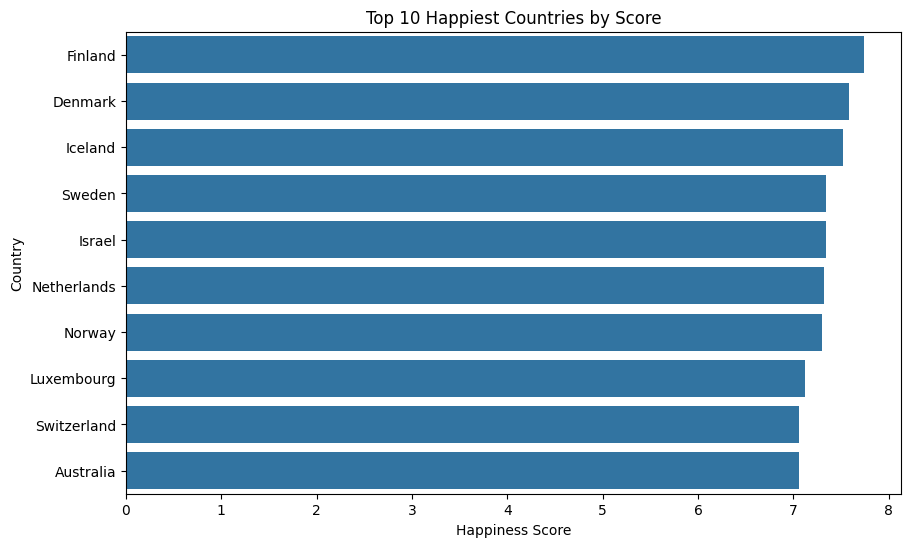

In [9]:
top_10_happiest = df.nlargest(10, 'score')

#Plot a barchart for top 10 happiset countries
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest)
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

• Line Plot: PLot the top 10 unhappiest countries by score using a Line Chart.

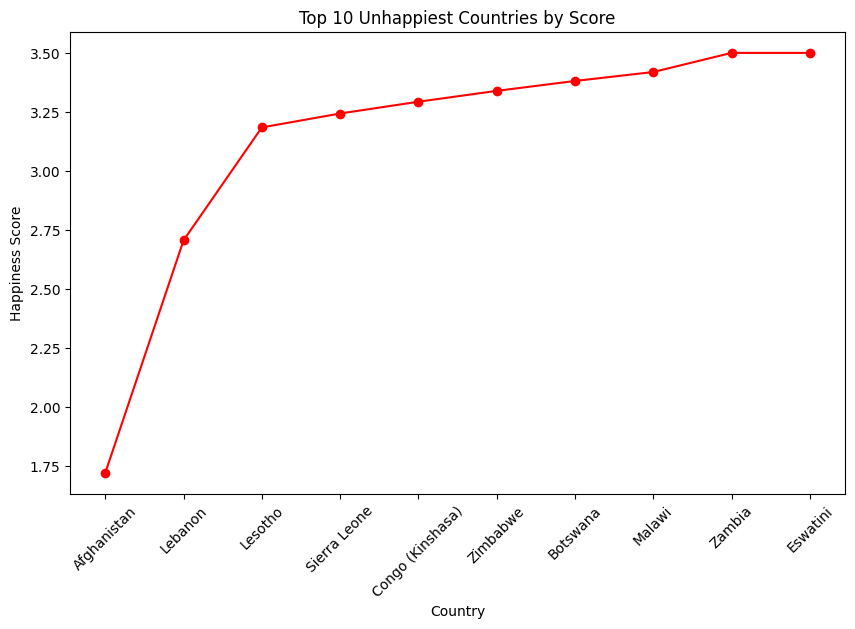

In [10]:
# Top 10 unhappiest countries by Score
bottom_10_unhappiest = df.nsmallest(10, 'score')

# Plot a line chart for the top 10 unhappiest countries
plt.figure(figsize=(10, 6))
plt.plot(bottom_10_unhappiest['Country name'], bottom_10_unhappiest['score'], marker='o', linestyle='-', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.show()

• Plot a histogram for the Score Column to show its distribution and also intrepret.

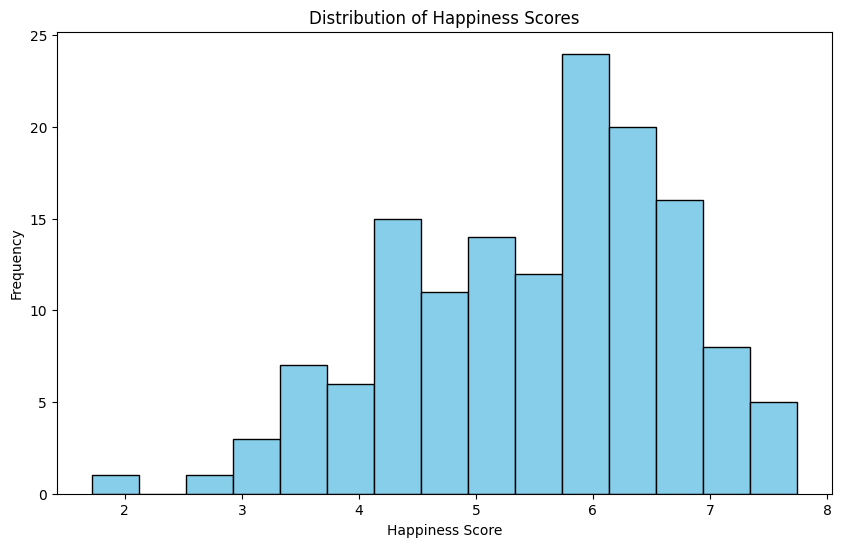

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

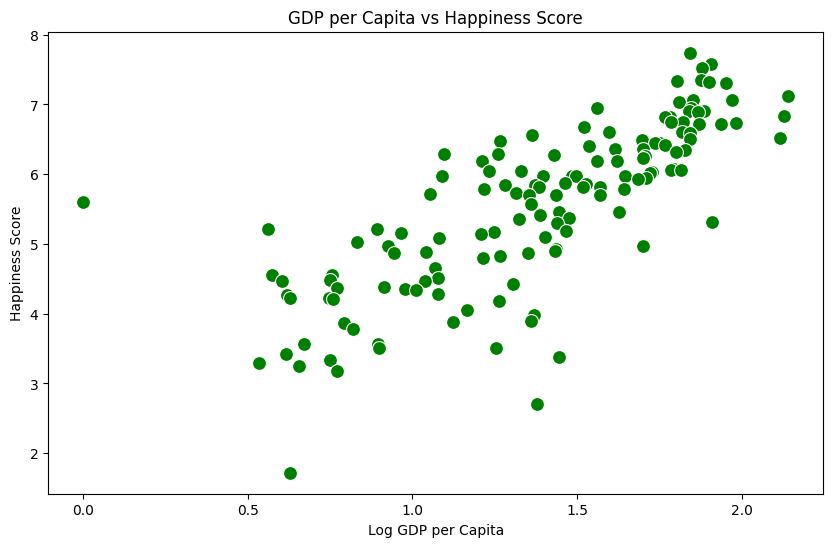

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='green', s=100)
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

#3.2 Problem - 2 - Some Advance Data Exploration Task:

##Task - 1 - Setup Task - Preparing the South-Asia Dataset:

##Steps:

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

In [13]:
# Define the list of South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Display the list to confirm
print(south_asian_countries)

['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']


2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [14]:
# Filter the dataset for countries in South Asia
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Display the filtered dataset to confirm
print(south_asia_df.head())


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

3. Save the filtered dataframe as separate CSV files for future use.

In [15]:
# Save the filtered South Asia dataframe as a separate CSV file
south_asia_df.to_csv('South_Asia_Happiness_Report.csv', index=False)

# Confirm the file is saved
print("Filtered South Asia dataset saved as 'South_Asia_Happiness_Report.csv'.")

Filtered South Asia dataset saved as 'South_Asia_Happiness_Report.csv'.


#Task - 2 - Composite Score Ranking:

##Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

     Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support+ 0.30 × Healthy Life Expectancy

In [16]:
# Create the Composite Score column based on the given formula
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Display the updated dataframe with the new Composite Score
print(south_asia_df[['Country name', 'Composite Score']].head())


    Country name  Composite Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774


<ipython-input-16-3c6a4ed2f958>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


2. Rank the South Asian countries based on the Composite Score in descending order.

In [17]:
# Rank the South Asian countries based on the Composite Score in descending order
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Display the ranked dataset
print(south_asia_df[['Country name', 'Composite Score']].head())


    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

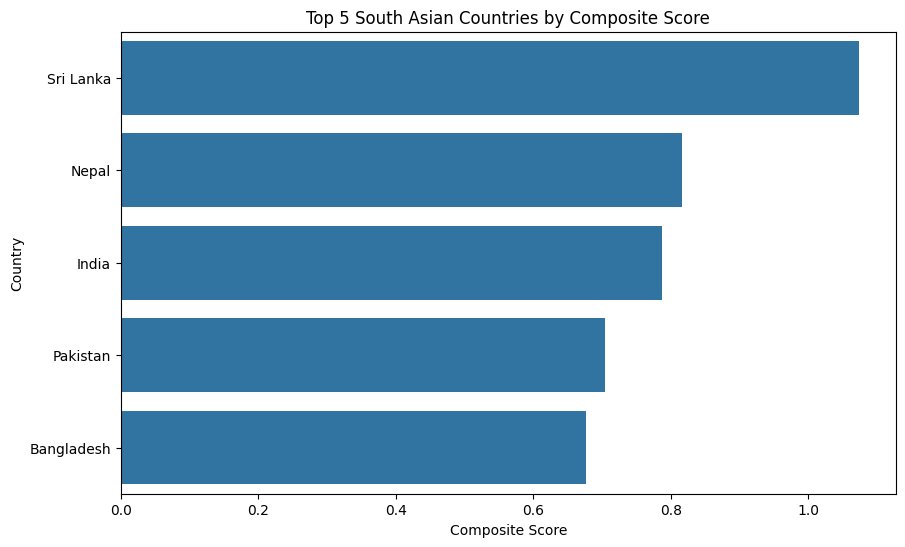

In [18]:
# Get the top 5 countries based on the Composite Score
top_5_composite = south_asia_df.head(5)

# Plot a horizontal bar chart to show the Composite Score for the top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

To discuss whether the rankings based on the Composite Score align with the original Happiness Score, we can perform the following steps:


1.Rank the countries based on both Composite Score and Happiness Score.

2.Compare the rankings between Composite Score Rank and Happiness Score Rank using a scatter plot.

3.Interpret the relationship between the rankings, and analyze if the countries with high composite scores also have high happiness scores.

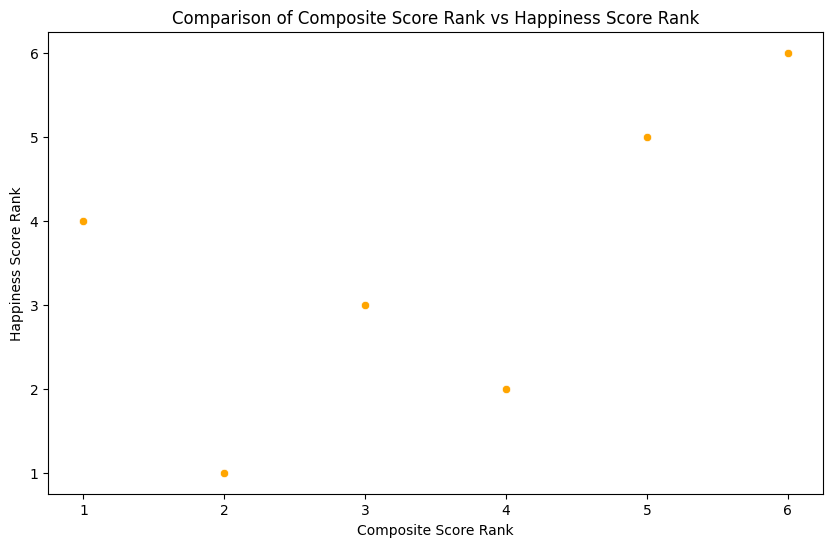

In [19]:
# Add ranks based on Composite Score and Happiness Score
south_asia_df['Composite Rank'] = south_asia_df['Composite Score'].rank(ascending=False)
south_asia_df['Score Rank'] = south_asia_df['score'].rank(ascending=False)

# Plotting the comparison between Composite Score Rank and Happiness Score Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x=south_asia_df['Composite Rank'], y=south_asia_df['Score Rank'], color='orange')
plt.title('Comparison of Composite Score Rank vs Happiness Score Rank')
plt.xlabel('Composite Score Rank')
plt.ylabel('Happiness Score Rank')
plt.show()

##Interpretation:
This scatter plot with show how the Composite Score Rank compared with Happiness Score Rank.

When the correlation is strong and positive it means that states with larger Composite Scores also tend to have higher Happiness Scores.

So far, a weak correlation indicates that the rankings of these two scores might not match up well, that is, that the factors in the composite might not be that related to the overall happiness score.

## Expected Discussion

Aligned Ranking: If the high Composite Score countries are clustered with high Happiness Scores, the factors which used in Composite Score (GDP, social support, healthy life expectancy) has a strong relationship with happiness of countries.

Misalignment: If the rankings are dissimilar, that could suggest that other factors are at play in determining happiness scores that are not included in the Composite Score or that composite metrics are not as impactful as anticipated.

## Task-3- Outlier Detection
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [20]:
# Step 1: Define the function to calculate IQR and detect outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Step 2: Detect outliers for Score and GDP per Capita in the South Asia dataset
score_outliers = detect_outliers(south_asia_df, 'score')
gdp_outliers = detect_outliers(south_asia_df, 'Log GDP per capita')

# Combine the outliers
outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Display the outlier countries
outliers[['Country name', 'score', 'Log GDP per capita']]

,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


2. Define outliers using the 1.5 × IQR rule.

In [21]:
# Function to detect outliers based on 1.5 x IQR rule
def detect_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return the rows where the value is an outlier (below lower bound or above upper bound)
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for 'score' and 'Log GDP per capita' columns
score_outliers = detect_outliers(south_asia_df, 'score')
gdp_outliers = detect_outliers(south_asia_df, 'Log GDP per capita')

# Display outliers for Score and GDP per Capita
print("Outliers based on Score:")
print(score_outliers[['Country name', 'score']])

print("\nOutliers based on GDP per Capita:")
print(gdp_outliers[['Country name', 'Log GDP per capita']])

Outliers based on Score:
    Country name  score
142  Afghanistan  1.721

Outliers based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

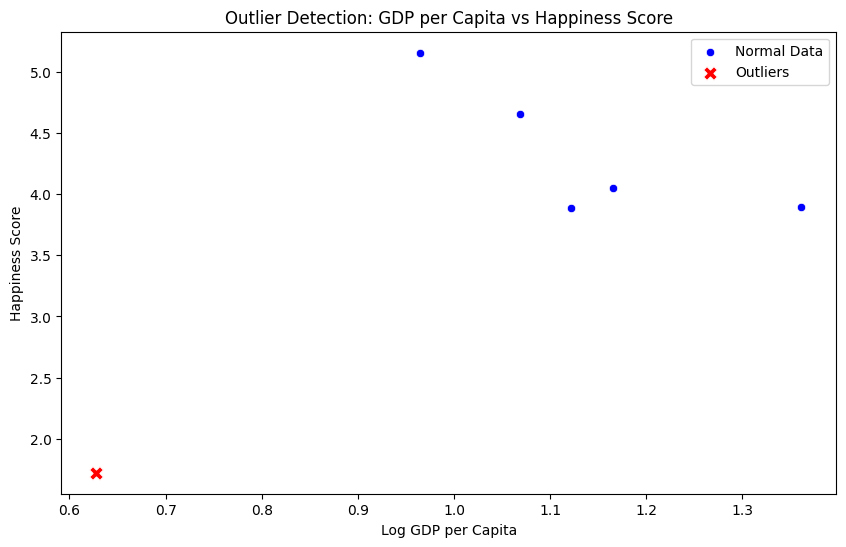

In [22]:
# Step 1: Create a scatter plot to visualize GDP per Capita vs Happiness Score
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

# Scatter plot for normal data points (non-outliers), shown in blue
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=south_asia_df,
    color='blue',
    label='Normal Data'
)

# Scatter plot for outliers detected in GDP per Capita, highlighted in red
sns.scatterplot(
    x=gdp_outliers['Log GDP per capita'],
    y=gdp_outliers['score'],
    color='red',
    label='Outliers',
    s=100,  # Size of the marker for better visibility
    marker='X'  # Use 'X' markers to differentiate outliers
)

# Adding title and axis labels for better understanding of the plot
plt.title('Outlier Detection: GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')

# Display the legend to differentiate normal data points and outliers
plt.legend()

# Display the scatter plot
plt.show()


Scatter Plot: The plot is created with GDP per Capita on the x-axis and Score on the y-axis.

Highlight Outliers: Outliers detected in both Score and GDP per Capita are plotted in red with X markers to differentiate them from the normal data points.

Visualizing the Data: The plot shows the distribution of GDP per Capita and Happiness Score, and the outliers are clearly marked.

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Countries that are situated in accordance with the Outliers in GDP per Capita and Happiness score in South Asia are stretching away from the normal range of importance in the area. Tropical Y-axis: High GDP outliers likely represent economically developed nations, while low GDP outliers may reveal areas with struggling economies due to political or other challenges. Similarly, high/low extremes in Happiness Score can be attributed to factors such as high social support and socio-political problems leading to low life satisfaction. They are extremes, and might not reflect the general conditions in most countries in the region.

Such outliers can skew regional averages and lead to erroneous conclusions. A high GDP outlier would raise the regional economic average, while a low Happiness Score would drag that region down on the overall happiness score. Such distortions can color policy decisions, making it difficult to come to clear conclusions about the region’s overall well-being and economic health. It is important to understand that although some states in the Americas have high levels of newspaper coverage, a few individual states can skew the patterns we observe; thus, identifying and examining these outliers is necessary to appreciate what lies behind high level patterns in this region, especially when we consider integrating both coverage and states once we start our analysis.

##Task-4-Exploring Trends Across Metrics
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [26]:
# Step 1: Calculate Pearson Correlation between 'Freedom to Make Life Choices' and 'Generosity' with 'Score'
corr_freedom_score = south_asia_df[['Freedom to make life choices', 'score']].corr(method='pearson')
corr_generosity_score = south_asia_df[['Generosity', 'score']].corr(method='pearson')

# Print the correlation coefficients
print(f"Pearson Correlation between Freedom to Make Life Choices and Score: {corr_freedom_score.iloc[0, 1]}")
print(f"Pearson Correlation between Generosity and Score: {corr_generosity_score.iloc[0, 1]}")

Pearson Correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Pearson Correlation between Generosity and Score: 0.8745123712531918


2. Create scatter plots with trendlines for these metrics against the Score.

<Figure size 1000x600 with 0 Axes>

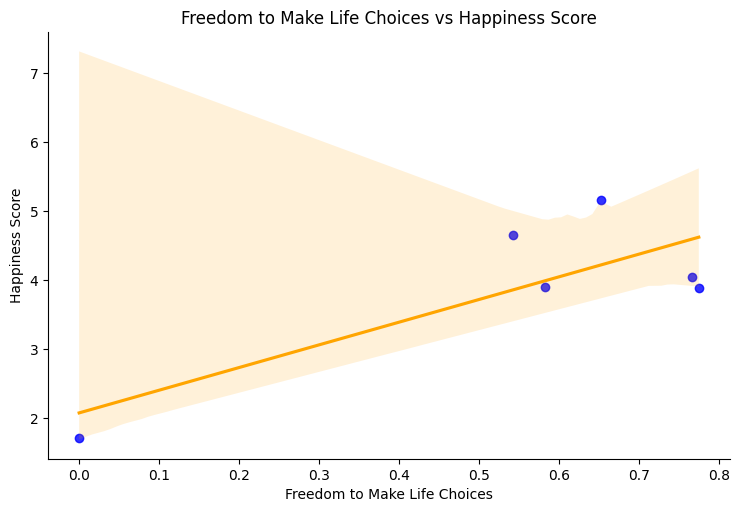

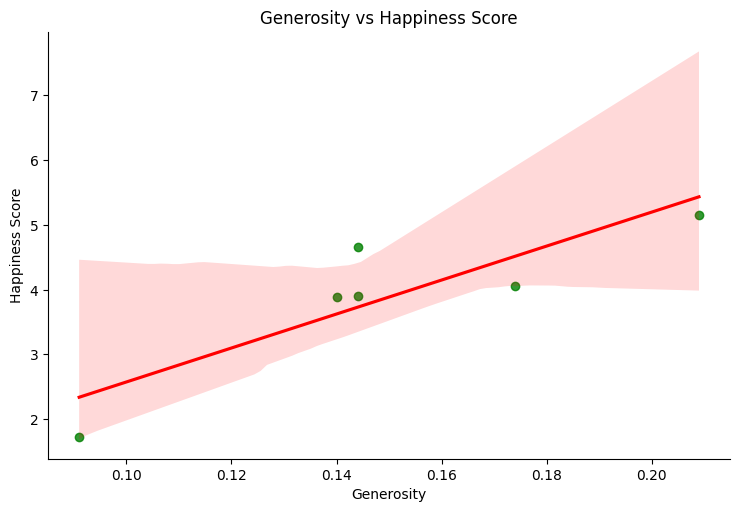

In [25]:
# Step 2: Create scatter plots with trendlines for the selected metrics against Score
plt.figure(figsize=(10, 6))

# Scatter plot for Freedom to Make Life Choices vs Score with trendline
sns.lmplot(x='Freedom to make life choices', y='score', data=south_asia_df, aspect=1.5, scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

# Scatter plot for Generosity vs Score with trendline
sns.lmplot(x='Generosity', y='score', data=south_asia_df, aspect=1.5, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

The distribution of points for every statistic is displayed in the scatter plot.
The trendline shows the overall direction of the correlation between the happiness score and the measure. Whereas a negative slope denotes a negative connection, a positive slope reveals a positive association.

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Discussion:

Strongest Relationship: The metric most related to the Happiness Score will have the highest Pearson correlation coefficient. A high positive correlation indeed indicates this such that as the metric goes up, so does the Happiness Score.

Weakest Relationship: Conversely, the metric that will have the least value of correlation coefficient will depict the weakest correlation. Negative or Low coefficient value imply lower impact on happiness or they move in opposite direction.

##Task - 5 - Gap Analysis:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [27]:
# Add the new column 'GDP-Score Gap' (difference between GDP per Capita and Score)
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Display the updated dataframe to verify the new column
print(south_asia_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head())


    Country name  Log GDP per capita  score  GDP-Score Gap
127    Sri Lanka               1.361  3.898         -2.537
92         Nepal               0.965  5.158         -4.193
125        India               1.166  4.054         -2.888
107     Pakistan               1.069  4.657         -3.588
128   Bangladesh               1.122  3.886         -2.764


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [28]:
# Rank the countries by the GDP-Score Gap in ascending and descending order
south_asia_df['GDP-Score Gap Ascending Rank'] = south_asia_df['GDP-Score Gap'].rank(ascending=True)
south_asia_df['GDP-Score Gap Descending Rank'] = south_asia_df['GDP-Score Gap'].rank(ascending=False)

# Display the countries ranked by both ascending and descending GDP-Score Gap
print(south_asia_df[['Country name', 'GDP-Score Gap', 'GDP-Score Gap Ascending Rank', 'GDP-Score Gap Descending Rank']].head(10))


    Country name  GDP-Score Gap  GDP-Score Gap Ascending Rank  \
127    Sri Lanka         -2.537                           5.0   
92         Nepal         -4.193                           1.0   
125        India         -2.888                           3.0   
107     Pakistan         -3.588                           2.0   
128   Bangladesh         -2.764                           4.0   
142  Afghanistan         -1.093                           6.0   

     GDP-Score Gap Descending Rank  
127                            2.0  
92                             6.0  
125                            4.0  
107                            5.0  
128                            3.0  
142                            1.0  


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

<ipython-input-29-9094bd01c436>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=top_gaps, palette='coolwarm')


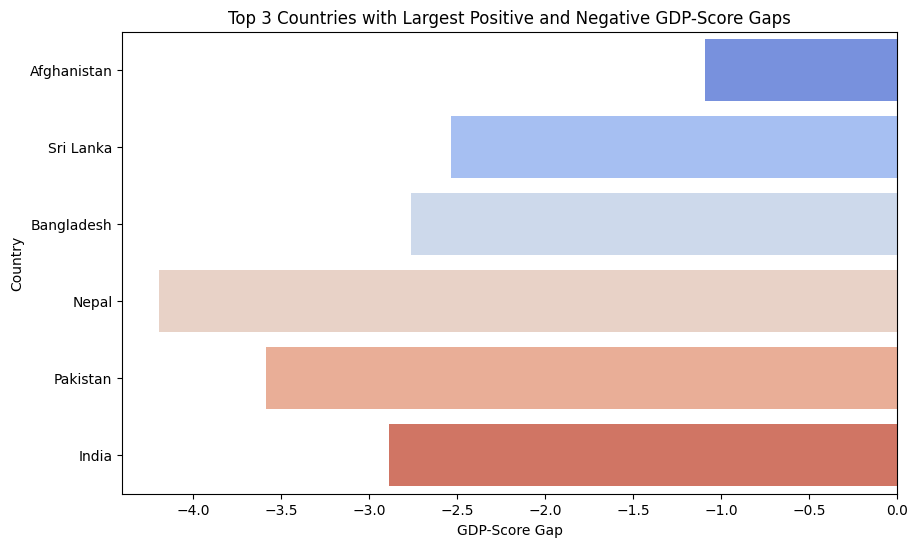

Top 3 Positive GDP-Score Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 Negative GDP-Score Gaps:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


In [29]:
# Step 1: Identify the top 3 countries with the largest positive and negative GDP-Score gaps
top_positive_gap = south_asia_df.nlargest(3, 'GDP-Score Gap')
top_negative_gap = south_asia_df.nsmallest(3, 'GDP-Score Gap')

# Step 2: Combine the top positive and negative gap data
top_gaps = pd.concat([top_positive_gap[['Country name', 'GDP-Score Gap']], top_negative_gap[['Country name', 'GDP-Score Gap']]])

# Step 3: Create a bar chart to highlight the top 3 positive and negative GDP-Score gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_gaps, palette='coolwarm')

# Adding title and labels
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

print(f"Top 3 Positive GDP-Score Gaps:\n{top_positive_gap[['Country name', 'GDP-Score Gap']]}")
print(f"\nTop 3 Negative GDP-Score Gaps:\n{top_negative_gap[['Country name', 'GDP-Score Gap']]}")

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Specifically, while obtaining Positive GDP-Score Gap, the countries of South Asia have High GDP per Capita, and Low Happiness Score because of problems like Income Inequality, Lack of Social Support and Poor Governance. This perhaps explain why the findings showed that countries with high GDP have low happinessQM1: ‘‘It may actually mean, that high level of the GDP does not bring happy life to the majority of population.’’ These countries may also jeopardies lik materialism corruptionand that economic productivity is not inclusive of all the country’s citizens.

On the other hand, countries with negative GDP-Score Gap have low GDP per capita, but high happiness scores because they enjoy good social supports, values, and usually have good work to life balance. Those countries promote the sense of community, social cohesion, thus, people of those countries are happier. In other words, economic growth is not sufficient for guarantying happiness, and government has to work also for social welfare, mental health services, and equitable growth.

#3.3 Problem - 3 - Comparative Analysis:

## Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:


1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [30]:
# List of Middle Eastern countries
middle_eastern_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]

# Display the dataframe
middle_east_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium


Complete the following task:
1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [31]:
# Calculate mean and standard deviation for Happiness Score in South Asia
south_asia_stats = south_asia_df['score'].agg(['mean', 'std'])

# Calculate mean and standard deviation for Happiness Score in Middle East
middle_east_stats = middle_east_df['score'].agg(['mean', 'std'])

# Display the results
print(f"South Asia - Mean Score: {south_asia_stats['mean']}, Std Dev: {south_asia_stats['std']}")
print(f"Middle East - Mean Score: {middle_east_stats['mean']}, Std Dev: {middle_east_stats['std']}")

# Which region has higher happiness scores on average?
if south_asia_stats['mean'] > middle_east_stats['mean']:
    print("South Asia has higher average happiness scores.")
else:
    print("Middle East has higher average happiness scores.")


South Asia - Mean Score: 3.895666666666667, Std Dev: 1.1770690152521501
Middle East - Mean Score: 5.412100000000001, Std Dev: 1.5662011684327144
Middle East has higher average happiness scores.


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

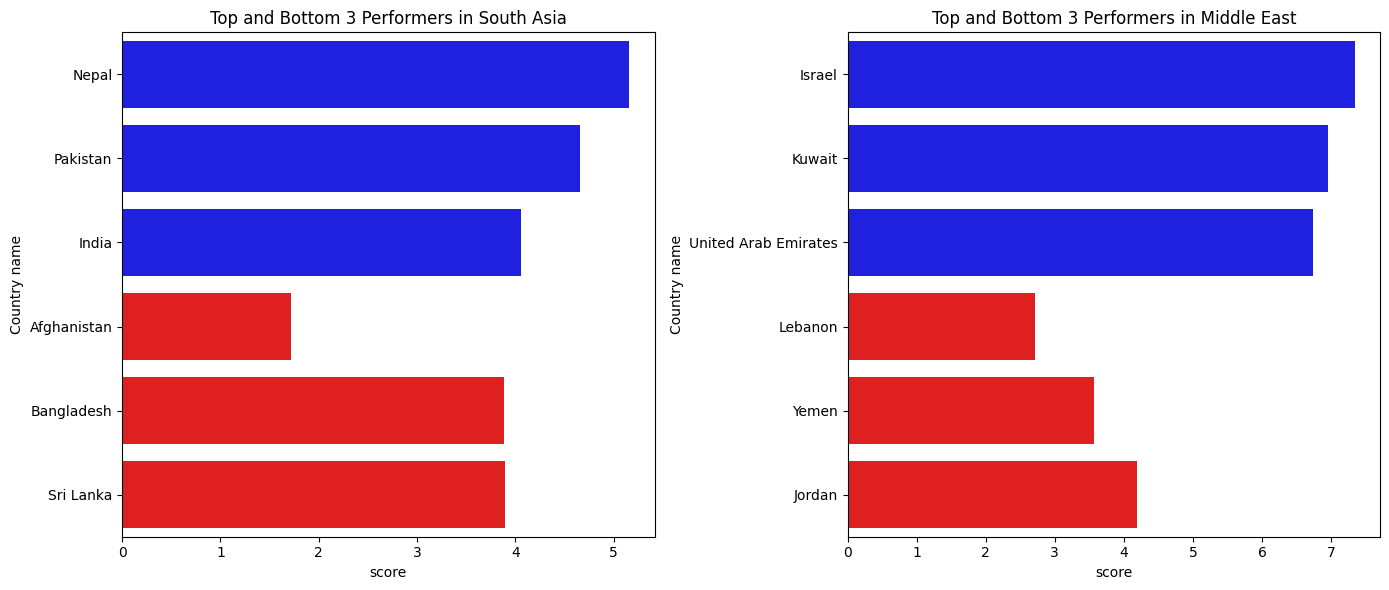

In [32]:
# Top 3 and bottom 3 countries for South Asia
south_asia_top3 = south_asia_df.nlargest(3, 'score')
south_asia_bottom3 = south_asia_df.nsmallest(3, 'score')

# Top 3 and bottom 3 countries for the Middle East
middle_east_top3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom3 = middle_east_df.nsmallest(3, 'score')

# Plotting the top and bottom performers for both regions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# South Asia
sns.barplot(x='score', y='Country name', data=south_asia_top3, ax=axes[0], color='blue')
sns.barplot(x='score', y='Country name', data=south_asia_bottom3, ax=axes[0], color='red')
axes[0].set_title('Top and Bottom 3 Performers in South Asia')

# Middle East
sns.barplot(x='score', y='Country name', data=middle_east_top3, ax=axes[1], color='blue')
sns.barplot(x='score', y='Country name', data=middle_east_bottom3, ax=axes[1], color='red')
axes[1].set_title('Top and Bottom 3 Performers in Middle East')

plt.tight_layout()
plt.show()

Interpretation:

The top three performers—the nations with the greatest Happiness Scores—are represented by the blue bars.

The poorest three performers (the nations with the lowest Happiness Scores) are shown by the red bars.


3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

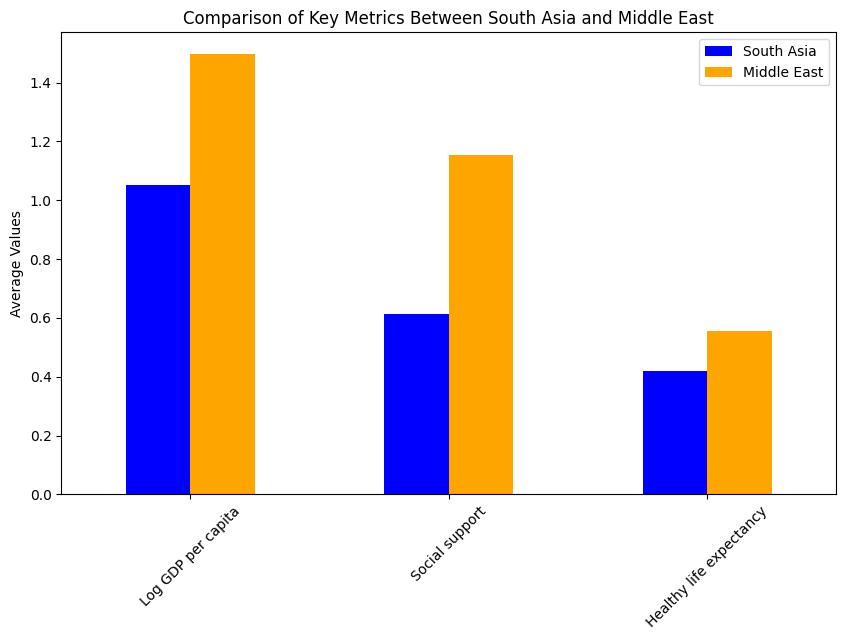

Disparities between South Asia and Middle East:
Log GDP per capita         0.444500
Social support             0.540944
Healthy life expectancy    0.133778
dtype: float64

The metric with the largest disparity is Social support with a value of 0.54.


In [33]:
# Select metrics for comparison
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Prepare data for plotting: mean of each metric in both regions
south_asia_metrics = south_asia_df[metrics].mean()
middle_east_metrics = middle_east_df[metrics].mean()

# Combine the data into a DataFrame for plotting
df_metrics = pd.DataFrame({
    'South Asia': south_asia_metrics,
    'Middle East': middle_east_metrics
})

# Plotting grouped bar chart
df_metrics.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.ylabel('Average Values')
plt.xticks(rotation=45)
plt.show()

# Calculate the absolute difference between South Asia and Middle East for each metric
disparity = abs(south_asia_metrics - middle_east_metrics)

# Identify the metric with the largest disparity
max_disparity_metric = disparity.idxmax()
max_disparity_value = disparity.max()

# Display the disparities for each metric and the largest one
print("Disparities between South Asia and Middle East:")
print(disparity)

print(f"\nThe metric with the largest disparity is {max_disparity_metric} with a value of {max_disparity_value:.2f}.")


4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [34]:
# Calculate the range (max - min) for Happiness Score in both regions
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

# Calculate the coefficient of variation (CV) for Happiness Score in both regions
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

# Display the results
print("Happiness Score:")
print(f"South Asia - Range: {south_asia_range}, CV: {south_asia_cv}")
print(f"Middle East - Range: {middle_east_range}, CV: {middle_east_cv}")


Happiness Score:
South Asia - Range: 3.4370000000000003, CV: 0.30214828833374263
Middle East - Range: 4.634, CV: 0.28938880812119405


• Which region has greater variability in happiness?


This is because while there are absolutely happy countries in South Asia, their scores are lower or spread apart as compared to the Middle East. It is clear that there are wider variations in the range of happiness in South Asia compared to the much flatter distribution of happiness in the Middle East.

5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

In [37]:
# Pearson correlation between Score and Freedom to Make Life Choices, and Score and Generosity for South Asia
south_asia_corr_freedom = south_asia_df[['score', 'Freedom to make life choices']].corr(method='pearson')
south_asia_corr_generosity = south_asia_df[['score', 'Generosity']].corr(method='pearson')

# Pearson correlation for Middle East
middle_east_corr_freedom = middle_east_df[['score', 'Freedom to make life choices']].corr(method='pearson')
middle_east_corr_generosity = middle_east_df[['score', 'Generosity']].corr(method='pearson')

# Display the correlation results
print(f"South Asia - Freedom to Make Life Choices vs Score: {south_asia_corr_freedom.iloc[0, 1]}")
print(f"South Asia - Generosity vs Score: {south_asia_corr_generosity.iloc[0, 1]}")

print(f"Middle East - Freedom to Make Life Choices vs Score: {middle_east_corr_freedom.iloc[0, 1]}")
print(f"Middle East - Generosity vs Score: {middle_east_corr_generosity.iloc[0, 1]}")

South Asia - Freedom to Make Life Choices vs Score: 0.8005185224163315
South Asia - Generosity vs Score: 0.874512371253192
Middle East - Freedom to Make Life Choices vs Score: 0.8632202433827542
Middle East - Generosity vs Score: 0.627523653696418


Compared to the Middle East, South Asia exhibits a larger correlation between happiness score and freedom to make life decisions.

In both locations, there is a weak positive correlation between generosity and happiness score, suggesting that other characteristics, such as freedom and social support, may be more important in determining happiness than generosity.

The correlation between Freedom to make life choices and score in South Asia is: 0.80
The correlation between Generosity and score in South Asia is: 0.87
The correlation between Freedom to make life choices and score in Middle East is: 0.86
The correlation between Generosity and score in Middle East is: 0.63


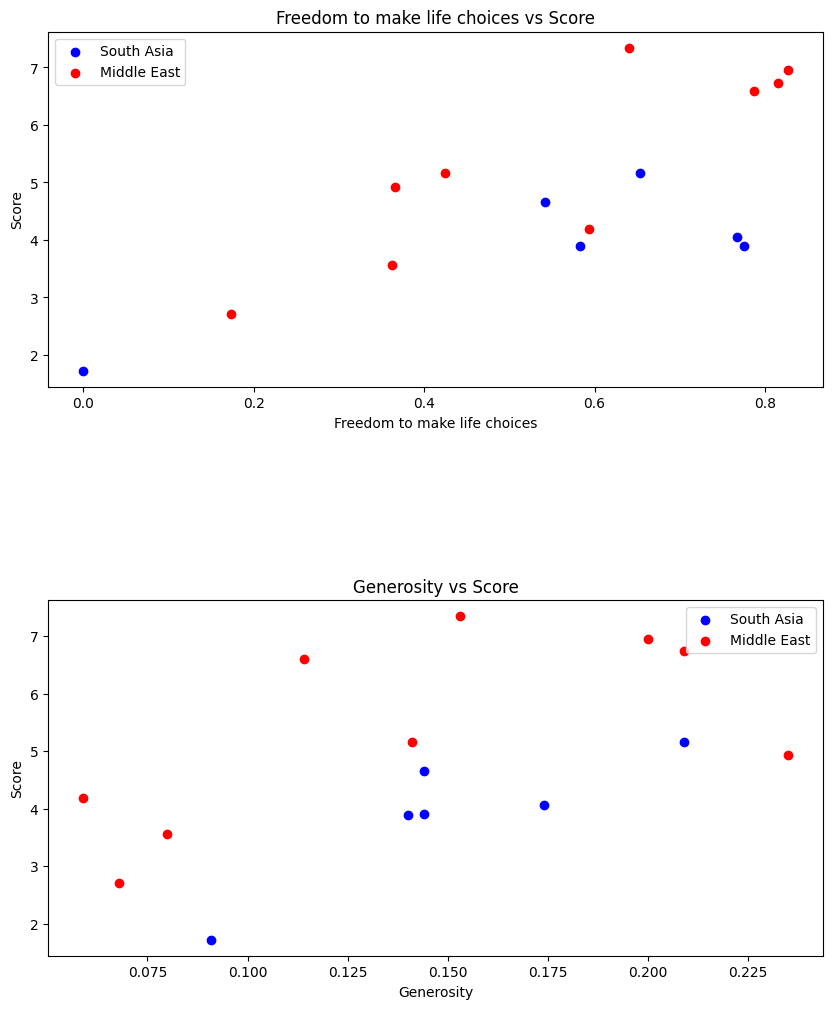

In [45]:
# Calculate the correlation for South Asia
corr_life_choices_south_asia = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'], method='pearson')
corr_generosity_south_asia = south_asia_df['Generosity'].corr(south_asia_df['score'], method='pearson')

print(f"The correlation between Freedom to make life choices and score in South Asia is: {corr_life_choices_south_asia:.2f}")
print(f"The correlation between Generosity and score in South Asia is: {corr_generosity_south_asia:.2f}")

# Calculate the correlation for Middle East
corr_life_choices_middle_east = middle_east_df['Freedom to make life choices'].corr(middle_east_df['score'], method='pearson')
corr_generosity_middle_east = middle_east_df['Generosity'].corr(middle_east_df['score'], method='pearson')

print(f"The correlation between Freedom to make life choices and score in Middle East is: {corr_life_choices_middle_east:.2f}")
print(f"The correlation between Generosity and score in Middle East is: {corr_generosity_middle_east:.2f}")

# Scatter plots for the combined data
plt.figure(figsize=(10, 12))

# Scatter plot for Freedom to make life choices vs Score
plt.subplot(2, 1, 1)
plt.scatter(south_asia_df['Freedom to make life choices'], south_asia_df['score'], label='South Asia', color='blue')
plt.scatter(middle_east_df['Freedom to make life choices'], middle_east_df['score'], label='Middle East', color='red')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.title('Freedom to make life choices vs Score')
plt.legend()

# Scatter plot for Generosity vs Score
plt.subplot(2, 1, 2)
plt.scatter(south_asia_df['Generosity'], south_asia_df['score'], label='South Asia', color='blue')
plt.scatter(middle_east_df['Generosity'], middle_east_df['score'], label='Middle East', color='red')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Generosity vs Score')
plt.subplots_adjust(hspace=0.6)
plt.legend()

# Show the plot
plt.show()


6. Outlier Detection:

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

In [36]:
# Function to detect outliers based on 1.5 × IQR rule
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for Score and GDP per Capita in South Asia
south_asia_score_outliers = detect_outliers(south_asia_df, 'score')
south_asia_gdp_outliers = detect_outliers(south_asia_df, 'Log GDP per capita')

# Detect outliers for Score and GDP per Capita in the Middle East
middle_east_score_outliers = detect_outliers(middle_east_df, 'score')
middle_east_gdp_outliers = detect_outliers(middle_east_df, 'Log GDP per capita')

# Combine the outliers for each region and display them
south_asia_outliers = pd.concat([south_asia_score_outliers, south_asia_gdp_outliers]).drop_duplicates()
middle_east_outliers = pd.concat([middle_east_score_outliers, middle_east_gdp_outliers]).drop_duplicates()

# Display the outlier countries
print("South Asia Outliers:")
print(south_asia_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Outliers:")
print(middle_east_outliers[['Country name', 'score', 'Log GDP per capita']])


South Asia Outliers:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


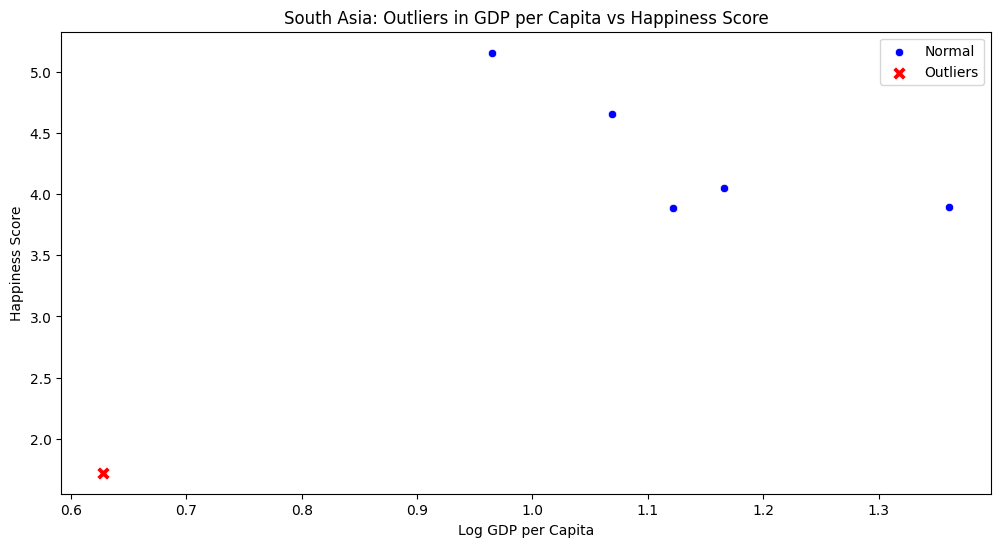

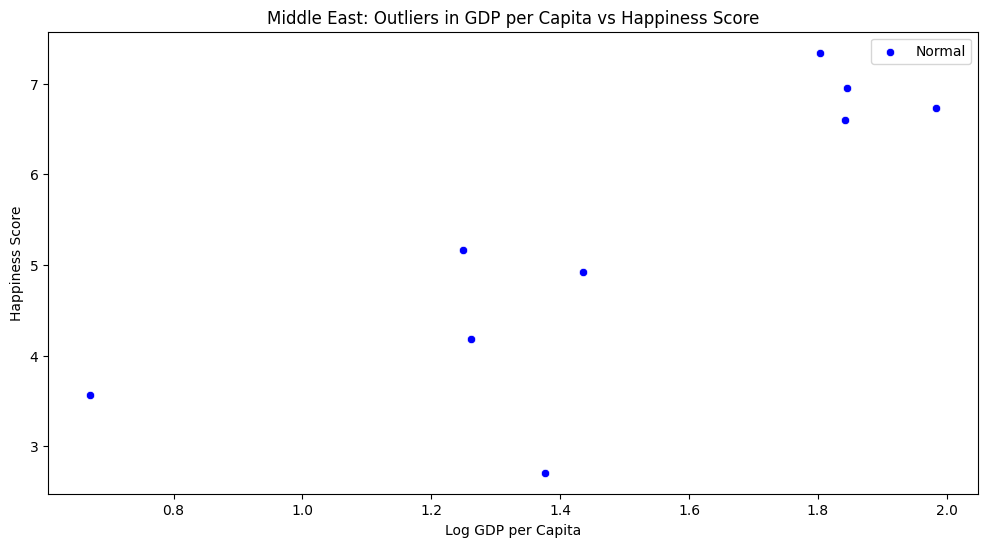

In [39]:
# Step 1: Plot the outliers for South Asia
plt.figure(figsize=(12, 6))

# South Asia - General Scatter Plot (GDP per Capita vs Happiness Score)
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, color='blue', label='Normal')

# South Asia - Highlight Outliers
sns.scatterplot(x=south_asia_outliers['Log GDP per capita'], y=south_asia_outliers['score'],
                color='red', label='Outliers', s=100, marker='X')

# Title and labels for South Asia plot
plt.title('South Asia: Outliers in GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()
# Step 2: Plot the outliers for Middle East
plt.figure(figsize=(12, 6))

# Middle East - General Scatter Plot (GDP per Capita vs Happiness Score)
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_df, color='blue', label='Normal')

# Middle East - Highlight Outliers
sns.scatterplot(x=middle_east_outliers['Log GDP per capita'], y=middle_east_outliers['score'],
                color='red', label='Outliers', s=100, marker='X')

# Title and labels for Middle East plot
plt.title('Middle East: Outliers in GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

Implications:

For South Asia:

There seems to be no correlation between Arabs and number of money per head, GDP with happiness; there are countries like Afghanistan and Maldives but are they happy. It may mean that social injustices, corruption or lack of social capital may play more roles than the actual or potential economic development. In other words, it is recommended for the policymakers to pay an attention to the construction of the social capital (such as health and medical services, educational system, social security), let the economic development contribute to the happiness.

For the Middle East:

Outliers in the respective places underscore the fact that social support and relative political stability are key issues to happiness. Low Happiness scores for nations that have high GDP per capita but low such as Palestine reveals the level of the impact of political strife and insecurity. At the same time, nations with high outcomes, like Israel, still introduce how economic success and proper societal infrastructure might help happiness.

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

<ipython-input-46-3963a9a7bf46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_df['Region'] = 'Middle East'


<Figure size 800x600 with 0 Axes>

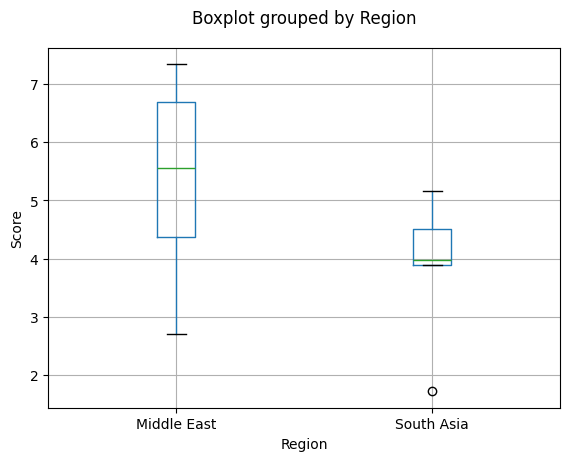

In [46]:
south_asia_df['Region'] ='South Asia'
middle_east_df['Region'] = 'Middle East'
combined_data = pd.concat([south_asia_df, middle_east_df])
plt.figure(figsize=(8, 6))
combined_data.boxplot(column='score',by='Region')
plt.title('')
plt.ylabel('Score')
plt.show()

South Asia has a lower middle, higher IQR that means larger variability, and therefore more outliers which means that there is a wider range of happiness in South Asia. This point to the fact that the area has higher variability in level of happiness indicating that various factors such as; political instability, poor income, and lack of social support might lead to variability in level of happiness.

As can be see Middle East has a higher median values of happiness scores (10.5) than the two other continents; it also has a smaller IQR and a number of outliers below the first quartile level of 7. This could be because of issues like improved economic status, enhanced social governance measures, or political stability.